In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [23]:
import pandas as pd
import numpy as np

In [ ]:
# prompt: load df_restaurants from '/content/drive/MyDrive/recommender_dataset/Yelp/yelp_dataset/yelp_restaurants.csv'

df_restaurants = pd.read_csv('/content/drive/MyDrive/recommender_dataset/Yelp/yelp_dataset/yelp_restaurants.csv')
df_restaurants.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,x2J-YIFeGZ-nsezzooVA9g,Twenty 21,2005 Market St,Philadelphia,PA,19103,39.954108,-75.174671,3.0,8,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",Restaurants,NaN
1,VlrSuulqTFeQfV2PToJGvg,Fung Garden,5118 Gall Blvd,Zephyrhills,FL,33542,28.232059,-82.180394,3.5,8,0,"{'RestaurantsTakeOut': 'True', 'HasTV': 'False...",Restaurants,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
2,mFE9V6LPpsDRUQLEBsBRRA,Pearl of East,2049 W Oregon Ave,Philadelphia,PA,19145,39.918635,-75.182422,3.0,17,1,"{'RestaurantsGoodForGroups': 'False', 'Busines...",Restaurants,"{'Monday': '10:30-22:30', 'Tuesday': '10:30-22..."
3,BXUqeFDqvTK2uL6sQd5YnQ,Crazy D’s Hot Chicken,101 University Ter,Reno,NV,89503,39.536288,-119.818231,3.5,37,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...",Restaurants,NaN
4,Bf1cdbdHXi8Omlkc7KShkg,Siam Cafe,435 Esplanade Ave,New Orleans,LA,70116,29.961968,-90.057356,4.0,9,0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...",Restaurants,NaN


In [ ]:


chunksize = 10000  # Adjust based on memory constraints
restaurant_ids = set(df_restaurants['business_id'])  # Efficient lookup for filtering
review_restaurants = pd.DataFrame()  # Initialize empty dataframe

for chunk in pd.read_json('/content/drive/MyDrive/recommender_dataset/Yelp/yelp_dataset/yelp_academic_dataset_review.json', lines=True, chunksize=chunksize):
    filtered_chunk = chunk[chunk['business_id'].isin(restaurant_ids)]  # Filter by business_id
    review_restaurants = pd.concat([review_restaurants, filtered_chunk])  # Append filtered chunk

review_restaurants.reset_index(drop=True, inplace=True)  # Reset index for consistency


In [ ]:
review_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    1202 non-null   object        
 1   user_id      1202 non-null   object        
 2   business_id  1202 non-null   object        
 3   stars        1202 non-null   int64         
 4   useful       1202 non-null   int64         
 5   funny        1202 non-null   int64         
 6   cool         1202 non-null   int64         
 7   text         1202 non-null   object        
 8   date         1202 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 84.6+ KB


In [ ]:
review_restaurants.iloc[0]

review_id                                 6zvfUswVZJ2mux5O2KLWZA
user_id                                   VegQsi_kJKltLDzhpy78bQ
business_id                               mFE9V6LPpsDRUQLEBsBRRA
stars                                                          1
useful                                                         0
funny                                                          0
cool                                                           0
text           I order from this restaraunt all the time usua...
date                                         2015-09-24 14:10:13
Name: 0, dtype: object

In [ ]:
review_restaurants.iloc[0].text

"I order from this restaraunt all the time usually for their bone in spear ribs, singapore mei fun, chicken wings, house lo mein and order often when it wasnt that good to begin with though it was conveinent on a late night. I had ordered a house lo mein chicken wings and ribs like usual and had a taste for pineapple on the side when i receives my delivery like always i tip the driver well and before i could get settled into my meal i noticed that my pineapple was missing so i called and notified them and i wanted them to bring it before they closed for the night and they told me they couldnt and i would have to get it the next day because their driver was gone home for the next which is not my problem i called 5 mins after he delivered to my house so i dont see why they couldnt reach him its not like we don't have cell phones in this age so I felt put off and dishonoured as a valued customer since every time I order I spend about $40 every time. So the next day I call and have to re e

In [ ]:
# prompt: save "review_restaurants" to the usual location

review_restaurants.to_csv('/content/drive/MyDrive/recommender_dataset/Yelp/yelp_dataset/yelp_review_restaurants.csv', index=False)


In [3]:
# prompt: create 'review_restaurants' dataframe from that csv file

review_restaurants = pd.read_csv('/content/drive/MyDrive/recommender_dataset/Yelp/yelp_dataset/yelp_review_restaurants.csv')


In [4]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 48.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 22

In [5]:
from flair.models import TextClassifier
from flair.data import Sentence

# Load the pre-trained sentiment analysis model
classifier = TextClassifier.load('en-sentiment')

def predict_sentiment(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    return sentence.labels[0]  # Return the full label object with probabilities

# Apply sentiment analysis and add label objects to dataframe
review_restaurants['sentiment_labels'] = review_restaurants['text'].apply(predict_sentiment)



2024-01-19 18:24:03,759 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpf8xbcj7z


100%|██████████| 253M/253M [00:11<00:00, 23.8MB/s]

2024-01-19 18:24:15,383 copying /tmp/tmpf8xbcj7z to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-01-19 18:24:16,427 removing temp file /tmp/tmpf8xbcj7z


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

ValueError: Columns must be same length as key

In [27]:
review_restaurants['sentiment_labels'].iloc[0].to_dict()

{'value': 'NEGATIVE', 'confidence': 0.999994158744812}

In [23]:
def extract_sentiment_probabilities(label_dict):
    value = label_dict['value']
    confidence = label_dict['confidence']
    return pd.Series({'POSITIVE': 1 - confidence if value == 'NEGATIVE' else confidence,
                      'NEGATIVE': confidence if value == 'NEGATIVE' else 1 - confidence})

review_restaurants[['POSITIVE', 'NEGATIVE']] = review_restaurants['sentiment_labels'].apply(lambda label: label.to_dict()).apply(extract_sentiment_probabilities)


In [26]:
review_restaurants[['POSITIVE', 'NEGATIVE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   POSITIVE  1202 non-null   float64
 1   NEGATIVE  1202 non-null   float64
dtypes: float64(2)
memory usage: 18.9 KB


In [28]:
# Drop the intermediate column
review_restaurants.drop('sentiment_labels', axis=1, inplace=True)

In [29]:
# prompt: save new 'review_restaurants' with sentiments columns to the usual location with an appropriate name

review_restaurants.to_csv('/content/drive/MyDrive/recommender_dataset/Yelp/yelp_dataset/yelp_review_restaurants_sentiment.csv', index=False)


In [3]:
# prompt: create dataframe 'review_restaurants' from "/content/drive/MyDrive/recommender_dataset/Yelp/yelp_dataset/yelp_review_restaurants_sentiment.csv"

review_restaurants = pd.read_csv('/content/drive/MyDrive/recommender_dataset/Yelp/yelp_dataset/yelp_review_restaurants_sentiment.csv')


In [4]:
review_restaurants.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,POSITIVE,NEGATIVE
0,6zvfUswVZJ2mux5O2KLWZA,VegQsi_kJKltLDzhpy78bQ,mFE9V6LPpsDRUQLEBsBRRA,1,0,0,0,I order from this restaraunt all the time usua...,2015-09-24 14:10:13,5.841255e-06,0.999994
1,d81YVT8beWziCWDDlbDTUg,7RPWoR8mW0GmuWvKT5Lv7A,mFE9V6LPpsDRUQLEBsBRRA,5,0,0,0,Absolutely the best Chinese food around! Quic...,2016-08-04 19:36:27,9.977201e-01,0.002280
2,RnenmgiDPKo4wXSKN-DG_w,OmBcJYK_IYDQTIF0LzFw4g,TCdNYh5tdjoNmA1WMx3ZPg,4,1,0,2,Rosalena's is like a time warp and I mean this...,2008-05-15 14:14:42,9.996544e-01,0.000346
3,HDH793SvKHLb2O5R22iQVw,-qoyKSF2G3PkR_7XNoJfpQ,WMGc5a7s6K5xX9JPTiRppQ,1,0,0,0,"Fast easy and near my office, but BAD. They s...",2006-01-31 17:35:06,3.671646e-05,0.999963
4,-kT-Rb6b1Sh6XoCwISdLPA,T6zcfyO8eR2Py9V_bK_K4w,x2J-YIFeGZ-nsezzooVA9g,1,2,1,0,Came here during weekday lunch w/ my cousin.\n...,2007-06-08 18:02:52,9.536743e-07,0.999999


In [9]:
len(review_restaurants['business_id'].unique())

114

In [24]:
np.sort(review_restaurants['stars'].unique())

array([1, 2, 3, 4, 5])

''

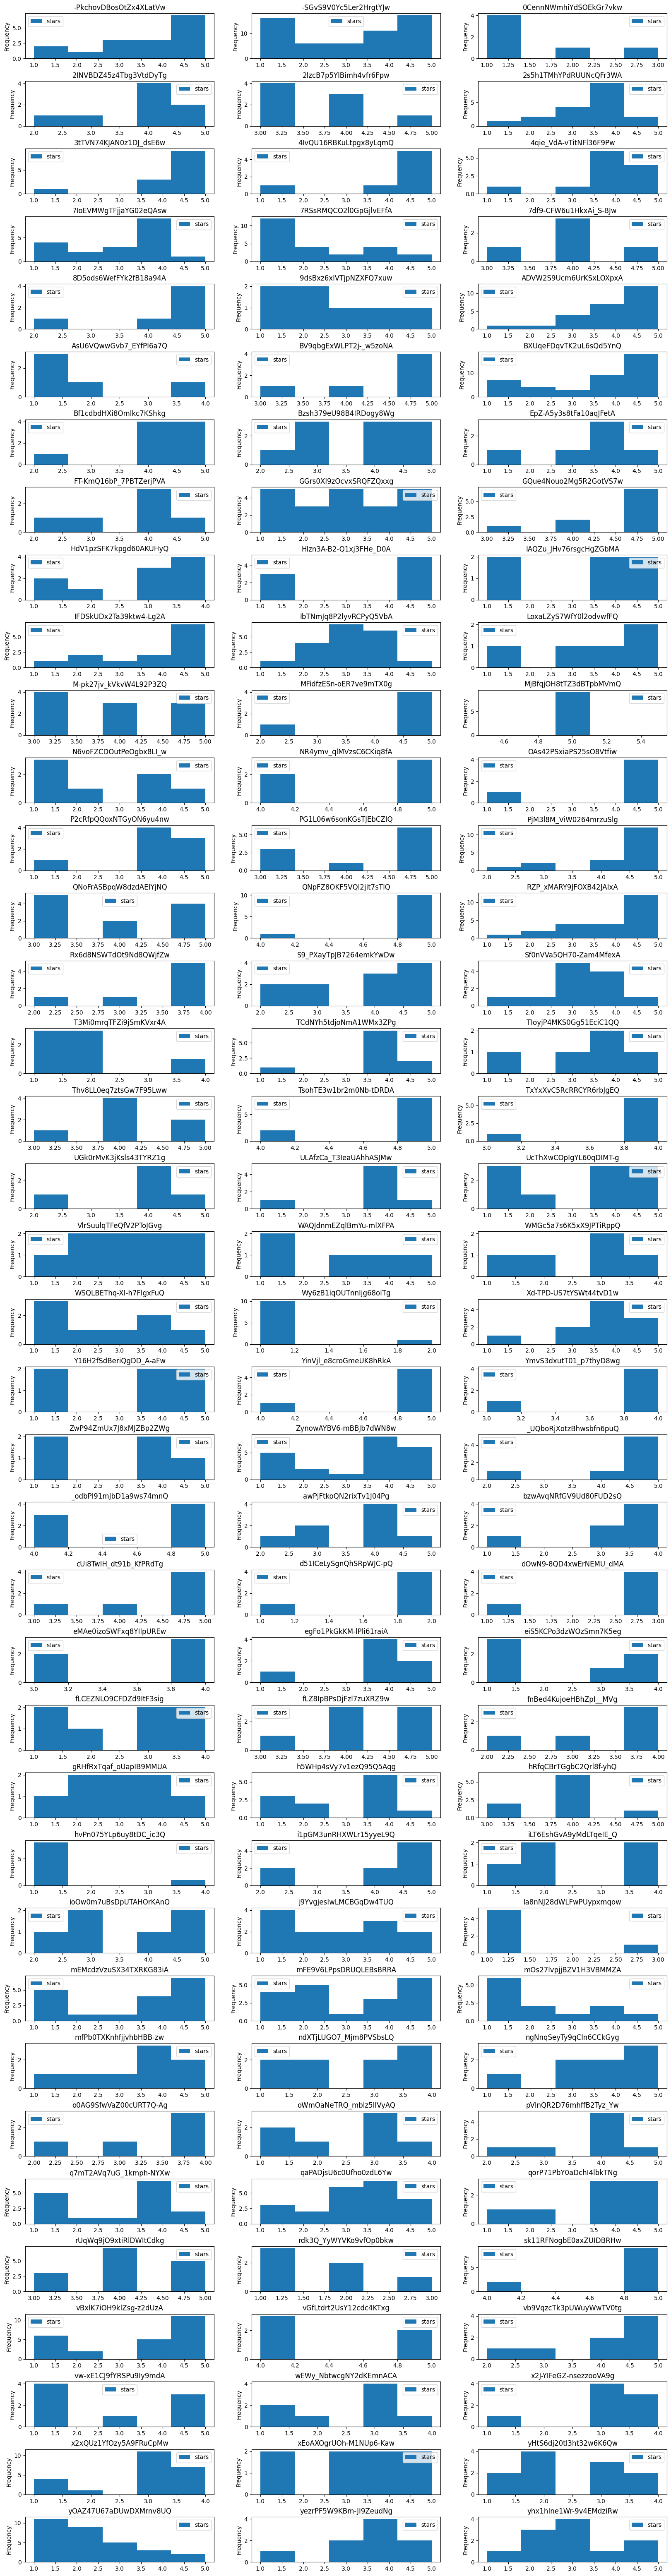

In [26]:
review_restaurants.plot.hist(column=["stars"], by="business_id", bins=5, layout=(38,3), figsize=(20,80))
;